In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)

In [4]:
# Open the Google Sheet by its name
sheet = gc.open("Student Feedback on Grading Fairness Final (Responses) - Form Responses 1").sheet1


In [5]:
# convert gspread to datafram
import pandas as pd
from gspread_dataframe import get_as_dataframe

df = get_as_dataframe(sheet)
df.head()  # Display the first few rows


,Timestamp,Semester,Department,Gender,GPA (Optional),The grading criteria in my courses are clearly explained by my instructors.,Please explain why you agree or disagree with the above statement. Have you ever experienced deviations from the HEC grading criteria?,"I believe my instructors follow the grading criteria as set by the HEC (e.g., 25% midterm, 40% final, 35% class participation including quizzes, assignments, presentations).",I believe that grading is fair and consistent across different instructors.,I feel that my instructors provide helpful feedback that improves my learning.,I think some instructors show favoritism when grading students’ work.,"I feel that instructors consider factors beyond my actual performance (like participation, attitude, or behavior) when assigning final grades.",The level of difficulty of exam questions reflects what is taught during the course.,The assignments and quizzes adequately prepare me for the level of questions asked in exams.,Can you share an experience where you felt the grade you received did not reflect your effort or understanding? What do you think caused that?,What suggestions would you make to make the grading process more fair and supportive?,"How does the type of feedback you receive (written comments, in-person discussions, etc.) influence your motivation and learning?","Whom do you consider the most impartial faculty member when it comes to grading with honesty, putting in time and effort, and delivering content effectively?\n\nFaculty complete name and department"
0,6/9/2025 10:00:30,7th,Computer Science,He,3.0 - 3.3,3,NaN,5 - Strongly Agree,2,4,4,4,2,3,asd,afdfadasdasd,dsfsdf,sdfdsf
1,6/9/2025 14:12:41,7th,Computer Science,She,3.0 - 3.3,4,NaN,5 - Strongly Agree,3,2,5 - Strongly Agree,5 - Strongly Agree,4,3,NaN,NaN,NaN,NaN
2,6/9/2025 14:16:23,5th,BBA,She,2.5 - 3.0,5 - Strongly Agree,No,5 - Strongly Agree,5 - Strongly Agree,5 - Strongly Agree,4,5 - Strongly Agree,1 - Strongly Disagree,1 - Strongly Disagree,Teachers sometimes demand perfection.,NaN,NaN,NaN
3,6/9/2025 14:19:07,7th,Computer Science,He,2.0 - 2.5,1 - Strongly Disagree,yes,1 - Strongly Disagree,1 - Strongly Disagree,1 - Strongly Disagree,1 - Strongly Disagree,1 - Strongly Disagree,1 - Strongly Disagree,1 - Strongly Disagree,"Yes, I recall a time during my final year in h...",To make the grading process more fair and supp...,The type of feedback I receive has a big impac...,To provide an accurate answer to this question...
4,6/9/2025 14:28:38,7th,Computer Science,He,2.5 - 3.0,3,NaN,4,3,4,5 - Strongly Agree,4,3,3,"Yes, I once received a lower grade in an advan...",\n\n,The type of feedback you get can boost motivat...,Sir Azeem Aftab (bs computer science)


In [6]:
df.shape

(69, 18)

In [7]:
# Strip any leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()


In [8]:
# column names and types
print(df.dtypes)



Timestamp                                                                                                                                                                                                object
Semester                                                                                                                                                                                                 object
Department                                                                                                                                                                                               object
Gender                                                                                                                                                                                                   object
GPA (Optional)                                                                                                                                                          

In [9]:
# missing values per column
print(df.isnull().sum())


Timestamp                                                                                                                                                                                                 0
Semester                                                                                                                                                                                                  0
Department                                                                                                                                                                                                0
Gender                                                                                                                                                                                                    0
GPA (Optional)                                                                                                                                                                          

In [10]:
df.rename(columns={
    "The grading criteria in my courses are clearly explained by my instructors.": "Clear_Criteria",
    "I believe my instructors follow the grading criteria as set by the HEC (e.g., 25% midterm, 40% final, 35% class participation including quizzes, assignments, presentations).": "Follow_HEC_Criteria",
    "I believe that grading is fair and consistent across different instructors.": "Fair_Consistent_Grading",
    "I feel that my instructors provide helpful feedback that improves my learning.": "Helpful_Feedback",
    "I think some instructors show favoritism when grading students’ work.": "Instructor_Favoritism",
    "I feel that instructors consider factors beyond my actual performance (like participation, attitude, or behavior) when assigning final grades.": "Non_Academic_Factors",
    "The level of difficulty of exam questions reflects what is taught during the course.": "Exam_Difficulty_Alignment",
    "The assignments and quizzes adequately prepare me for the level of questions asked in exams.": "Assessment_Preparation",
}, inplace=True)


In [11]:
print(df.dtypes)


Timestamp                                                                                                                                                                                                object
Semester                                                                                                                                                                                                 object
Department                                                                                                                                                                                               object
Gender                                                                                                                                                                                                   object
GPA (Optional)                                                                                                                                                          

# copy created

In [12]:

df_copy = df.copy()


In [13]:
# Find unique values of Likert-type responses to understand scale
likert_columns = ['Clear_Criteria', 'Follow_HEC_Criteria', 'Fair_Consistent_Grading',
                  'Helpful_Feedback', 'Instructor_Favoritism', 'Non_Academic_Factors',
                  'Exam_Difficulty_Alignment', 'Assessment_Preparation']

for col in likert_columns:
    print(f"\n{col} Value Counts:")
    print(df_copy[col].value_counts())





Clear_Criteria Value Counts:
Clear_Criteria
5 - Strongly Agree       22
4                        16
3                        14
2                        10
1 - Strongly Disagree     7
Name: count, dtype: int64

Follow_HEC_Criteria Value Counts:
Follow_HEC_Criteria
5 - Strongly Agree       28
4                        16
1 - Strongly Disagree    10
3                         9
2                         6
Name: count, dtype: int64

Fair_Consistent_Grading Value Counts:
Fair_Consistent_Grading
4                        19
5 - Strongly Agree       16
3                        16
1 - Strongly Disagree    10
2                         8
Name: count, dtype: int64

Helpful_Feedback Value Counts:
Helpful_Feedback
5 - Strongly Agree       17
4                        16
1 - Strongly Disagree    15
3                        13
2                         8
Name: count, dtype: int64

Instructor_Favoritism Value Counts:
Instructor_Favoritism
2                        18
5 - Strongly Agree       17
4        

In [14]:
# # Define Likert-scale columns
# likert_columns = [
#     'The grading criteria in my courses are clearly explained by my instructors.',
#     'I believe my instructors follow the grading criteria as set by the HEC (e.g., 25% midterm, 40% final, 35% class participation including quizzes, assignments, presentations).',
#     'I believe that grading is fair and consistent across different instructors.',
#     'I feel that my instructors provide helpful feedback that improves my learning.',
#     'I think some instructors show favoritism when grading students’ work.',
#     'I feel that instructors consider factors beyond my actual performance (like participation, attitude, or behavior) when assigning final grades.',
#     'The level of difficulty of exam questions reflects what is taught during the course.',
#     'The assignments and quizzes adequately prepare me for the level of questions asked in exams.'
# ]

# # Define mapping for Likert-scale responses
# likert_mapping = {
#     '1 - Strongly Disagree': 1,
#     '2': 2,
#     '3': 3,
#     '4': 4,
#     '5 - Strongly Agree': 5
# }
# dff_copy=df.copy()
# # Apply mapping to Likert-scale columns
# for col in likert_columns:
#     dff_copy[col] = dff_copy[col].replace(likert_mapping)

# # Verify conversion
# print("\nLikert-Scale Columns After Conversion:")
# print(df[likert_columns].head(5))

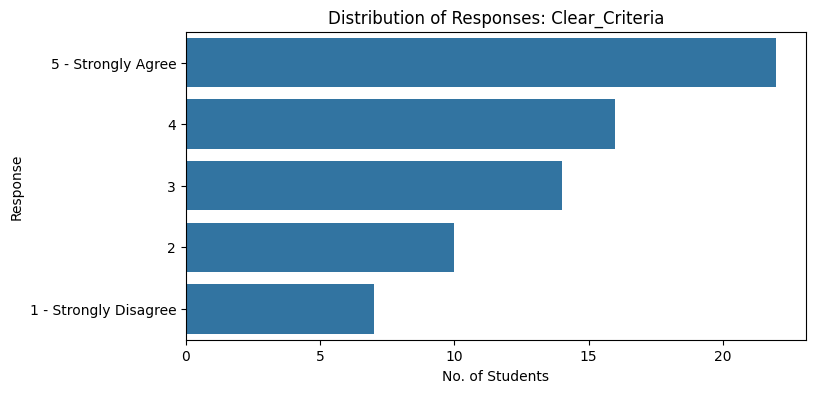

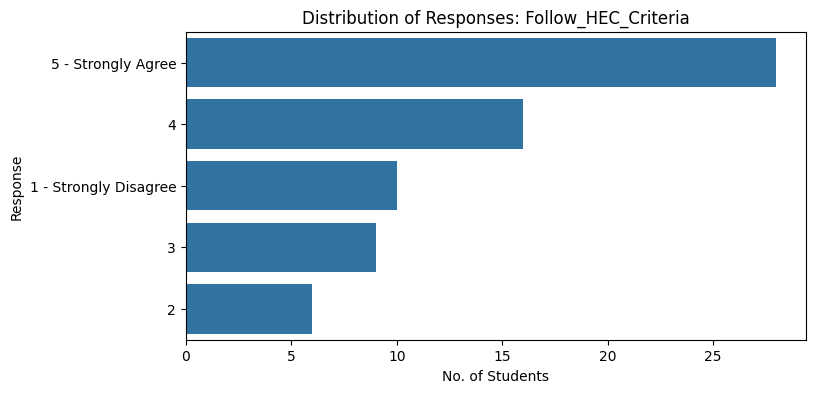

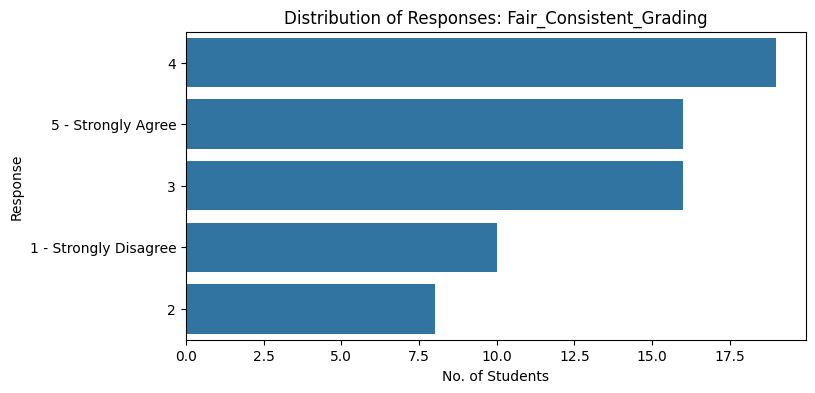

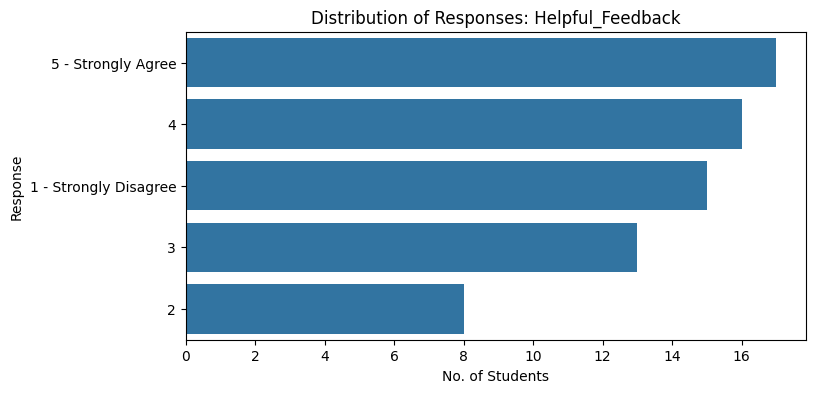

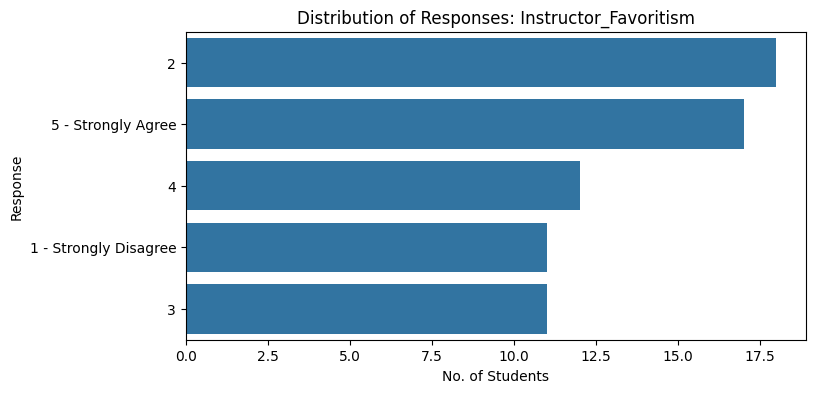

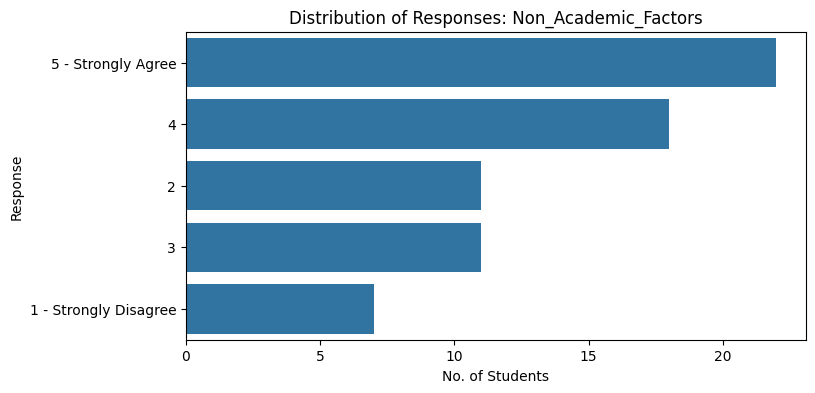

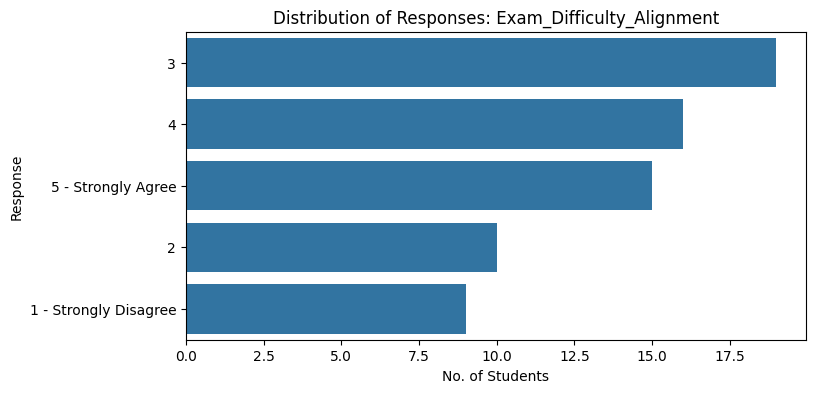

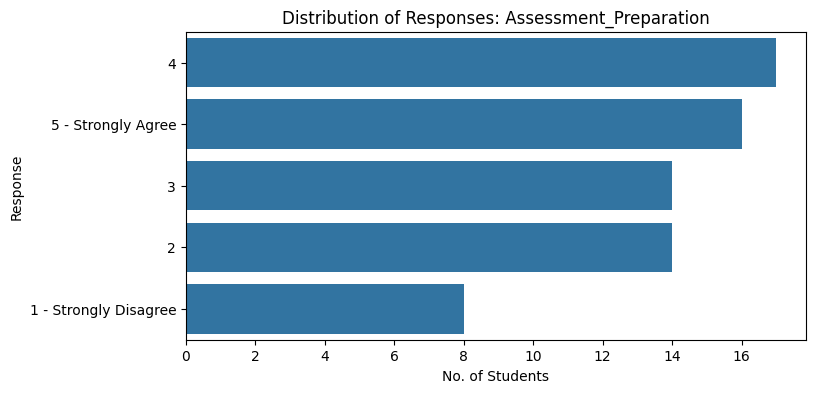

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize multiple columns
for col in likert_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of Responses: {col}")
    plt.xlabel("No. of Students")
    plt.ylabel("Response")
    plt.show()



In [16]:
pd.crosstab(df['Gender'], df['Fair_Consistent_Grading'], normalize='index') * 100



Fair_Consistent_Grading,2,3,4,1 - Strongly Disagree,5 - Strongly Agree
Gender,,,,,
He,17.142857,14.285714,31.428571,22.857143,14.285714
She,5.882353,32.352941,23.529412,5.882353,32.352941


In [17]:
# Check missing values in all columns
print("\nMissing Values in All Columns:")
print(df_copy.isnull().sum())

# Focus on Likert-scale columns
likert_columns = [
    'Clear_Criteria', 'Follow_HEC_Criteria', 'Fair_Consistent_Grading',
    'Helpful_Feedback', 'Instructor_Favoritism', 'Non_Academic_Factors',
    'Exam_Difficulty_Alignment', 'Assessment_Preparation'
]
print("\nMissing Values in Likert-Scale Columns:")
print(df_copy[likert_columns].isnull().sum())




Missing Values in All Columns:
Timestamp                                                                                                                                                                                                 0
Semester                                                                                                                                                                                                  0
Department                                                                                                                                                                                                0
Gender                                                                                                                                                                                                    0
GPA (Optional)                                                                                                                                          

In [19]:
# df_copy['GPA (Optional)'].value_counts()
# 	count
# GPA (Optional)
# 2.5 - 3.0	19
# 3.0 - 3.3	13
# 3.3 - 3.5	10
# 2.0 - 2.5	9
# 3.5 - 4.0 (Jahanumi)	7

# dtype: int64

# so far correct data

# Fix Masha Allah to 9th
and jahanumi to 3.5 -  4

In [20]:
# Check Semester values
print("\nSemester Value Counts Before Correction:")
print(df_copy['Semester'].value_counts())

# Replace 'MashaAllah' with '9th'
df_copy['Semester'] = df_copy['Semester'].replace('MashaAllah', '9th')

# Convert Semester to ordered categorical
semester_order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th']
df_copy['Semester'] = pd.Categorical(df_copy['Semester'], categories=semester_order, ordered=True)

# Verify
print("\nSemester Value Counts After Correction:")
print(df_copy['Semester'].value_counts())


Semester Value Counts Before Correction:
Semester
7th           16
1st           15
3rd           13
2nd            6
5th            5
6th            5
MashaAllah     4
4th            3
8th            2
Name: count, dtype: int64

Semester Value Counts After Correction:
Semester
7th    16
1st    15
3rd    13
2nd     6
5th     5
6th     5
9th     4
4th     3
8th     2
Name: count, dtype: int64


In [21]:
likert_columns = [
    'Clear_Criteria', 'Follow_HEC_Criteria', 'Fair_Consistent_Grading',
    'Helpful_Feedback', 'Instructor_Favoritism', 'Non_Academic_Factors',
    'Exam_Difficulty_Alignment', 'Assessment_Preparation'
]

# Overall descriptive statistics
descriptive_stats = df_copy[likert_columns].agg(['mean', 'median', 'std']).round(2)
print("\nDescriptive Statistics for Likert-Scale Questions:")
print(descriptive_stats)

# Segmented by Department
dept_stats = df_copy.groupby('Department')[likert_columns].mean().round(2)
print("\nMean Scores by Department:")
print(dept_stats)

# Segmented by Semester
semester_stats = df_copy.groupby('Semester')[likert_columns].mean().round(2)
print("\nMean Scores by Semester:")
print(semester_stats)

# Segmented by GPA
gpa_stats = df_copy.groupby('GPA (Optional)')[likert_columns].mean().round(2)
print("\nMean Scores by GPA:")
print(gpa_stats)

# Segmented by Gender
gender_stats = df_copy.groupby('Gender')[likert_columns].mean().round(2)
print("\nMean Scores by Gender:")
print(gender_stats)




TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [ ]:
# Check GPA values
print("\nGPA Value Counts Before Correction:")
print(df_copy['GPA (Optional)'].value_counts(dropna=False))

# Correct '3.5 - 4.0 (Jahanumi)' to '3.5 - 4.0'
df_copy['GPA (Optional)'] = df_copy['GPA (Optional)'].replace('3.5 - 4.0 (Jahanumi)', '3.5 - 4.0')

# Convert GPA to ordered categorical
gpa_order = ['2.0 - 2.5', '2.5 - 3.0', '3.0 - 3.3', '3.3 - 3.5', '3.5 - 4.0']
df_copy['GPA (Optional)'] = pd.Categorical(df_copy['GPA (Optional)'], categories=gpa_order, ordered=True)

# Impute missing GPA with mode ('2.5 - 3.0')
gpa_mode = df_copy['GPA (Optional)'].mode()[0]
df_copy['GPA (Optional)'] = df_copy['GPA (Optional)'].fillna(gpa_mode)

# Verify
print("\nGPA Value Counts After Correction and Imputation:")
print(df_copy['GPA (Optional)'].value_counts(dropna=False))

# after 9th semester mistake

In [ ]:
df_clean = df_copy.dropna(subset=likert_columns)
print(f"\nShape After Dropping Missing Values: {df_clean.shape}")



In [ ]:
# Define mapping
likert_mapping = {
    '1 - Strongly Disagree': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5 - Strongly Agree': 5
}

# Apply mapping
for col in likert_columns:
    df_clean[col] = df_clean[col].replace(likert_mapping)

# Verify conversion
print("\nLikert-Scale Columns After Conversion:")
print(df_clean[likert_columns].head(5))





In [ ]:
# Check GPA values
print("\nGPA Value Counts Before Correction:")
print(df_copy['GPA (Optional)'].value_counts(dropna=False))

# Correct '3.5 - 4.0 (Jahanumi)' to '3.5 - 4.0'
df_copy['GPA (Optional)'] = df_copy['GPA (Optional)'].replace('3.5 - 4.0 (Jahanumi)', '3.5 - 4.0')

# Convert GPA to ordered categorical
gpa_order = ['2.0 - 2.5', '2.5 - 3.0', '3.0 - 3.3', '3.3 - 3.5', '3.5 - 4.0']
df_copy['GPA (Optional)'] = pd.Categorical(df_copy['GPA (Optional)'], categories=gpa_order, ordered=True)

# Impute missing GPA with mode ('2.5 - 3.0')
gpa_mode = df_copy['GPA (Optional)'].mode()[0]
df_copy['GPA (Optional)'] = df_copy['GPA (Optional)'].fillna(gpa_mode)

# Verify
print("\nGPA Value Counts After Correction and Imputation:")
print(df_copy['GPA (Optional)'].value_counts(dropna=False))

# Clean Data

In [ ]:

df_copy.to_csv('cleaned_surveydata_v2.csv',index=False)

print("\nUpdated cleaned data saved to 'cleaned_survey_data_v2.csv'")

# Descriptive Statistics

In [ ]:
# Assuming 'df_copy' is the DataFrame you want to work with

# 1. Define the mapping (make sure it covers all possible text responses)
likert_mapping = {
    '1 - Strongly Disagree': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5 - Strongly Agree': 5
    # Add any other unexpected text values if they exist in your data that need mapping
}

# 2. Define your list of Likert columns
likert_columns = [
    'Clear_Criteria', 'Follow_HEC_Criteria', 'Fair_Consistent_Grading',
    'Helpful_Feedback', 'Instructor_Favoritism', 'Non_Academic_Factors',
    'Exam_Difficulty_Alignment', 'Assessment_Preparation'
]

# 3. Apply the mapping to convert text responses to numbers
for col in likert_columns:
    if col in df_copy.columns: # Check if column exists to prevent error
        df_copy[col] = df_copy[col].replace(likert_mapping)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# 4. CRUCIAL STEP: Explicitly convert the columns to numeric
#    Use errors='coerce' to turn any values that *still* can't be converted into NaN (Not a Number)
#    This helps identify any remaining non-numeric entries.
for col in likert_columns:
    if col in df_copy.columns:
        df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')

# 5. (Optional but good practice) Check the data types after conversion
print("\nData Types of Likert Columns after conversion:")
print(df_copy[likert_columns].dtypes)

# 6. Now, calculate your statistics
#    Note: 'mean', 'median', 'std' will ignore NaN values by default, which is usually desired.
descriptive_stats = df_copy[likert_columns].agg(['mean', 'median', 'std']).round(2)
print("\nDescriptive Statistics for Likert-Scale Questions:")
print(descriptive_stats)

# Segmented by Department
dept_stats = df_copy.groupby('Department')[likert_columns].mean().round(2)
print("\nMean Scores by Department:")
print(dept_stats)

# Segmented by Semester
semester_stats = df_copy.groupby('Semester')[likert_columns].mean().round(2)
print("\nMean Scores by Semester:")
print(semester_stats)

# Segmented by GPA
# Make sure 'GPA (Optional)' is clean and consistent if it contains different formats (e.g., "3.0-3.5", "4.0")
gpa_stats = df_copy.groupby('GPA (Optional)')[likert_columns].mean().round(2)
print("\nMean Scores by GPA:")
print(gpa_stats)

# Segmented by Gender
gender_stats = df_copy.groupby('Gender')[likert_columns].mean().round(2)
print("\nMean Scores by Gender:")
print(gender_stats)




In [ ]:
import pandas as pd

# Overall descriptive statistics
descriptive_stats = df_copy[likert_columns].agg(['mean', 'median', 'std']).round(2)
print("\nDescriptive Statistics:")
print(descriptive_stats)

# Segmented by Department
dept_stats = df_copy.groupby('Department')[likert_columns].mean().round(2)
print("\nMean Scores by Department:")
print(dept_stats)

# Segmented by Semester
semester_stats = df_copy.groupby('Semester', observed=True)[likert_columns].mean().round(2)
print("\nMean Scores by Semester:")
print(semester_stats)

# Segmented by GPA
gpa_stats = df_copy.groupby('GPA (Optional)', observed=True)[likert_columns].mean().round(2)
print("\nMean Scores by GPA:")
print(gpa_stats)

# Segmented by Gender
gender_stats = df_copy.groupby('Gender')[likert_columns].mean().round(2)
print("\nMean Scores by Gender:")
print(gender_stats)

In [ ]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# Reassign 'Other' to 'Computer Science'
df_copy['Department'] = df_copy['Department'].replace('Other', 'Computer Science')

# Verify Department counts
print("\nDepartment Value Counts After Reassignment:")
print(df_copy['Department'].value_counts())

In [ ]:
# Confirm data types
print("\nData Types:")
print(df_copy[['Semester', 'Department', 'Gender', 'GPA (Optional)'] + likert_columns].dtypes)

# Confirm GPA counts
print("\nGPA Value Counts:")
print(df_copy['GPA (Optional)'].value_counts())

# Confirm Semester counts
print("\nSemester Value Counts:")
print(df_copy['Semester'].value_counts())

Department Value Counts After Reassignment:
Department
Computer Science    40
Psychology          13
Media Studies        9
BBA                  7
Name: count, dtype: int64

Data Types:
Semester                     category
Department                     object
Gender                         object
GPA (Optional)               category
Clear_Criteria                  int64
Follow_HEC_Criteria             int64
Fair_Consistent_Grading         int64
Helpful_Feedback                int64
Instructor_Favoritism           int64
Non_Academic_Factors            int64
Exam_Difficulty_Alignment       int64
Assessment_Preparation          int64
dtype: object

GPA Value Counts:
GPA (Optional)
2.5 - 3.0    30
3.0 - 3.3    13
3.3 - 3.5    10
2.0 - 2.5     9
3.5 - 4.0     7
Name: count, dtype: int64

Semester Value Counts:
Semester
7th    16
1st    15
3rd    13
2nd     6
5th     5
6th     5
9th     4
4th     3
8th     2
Name: count, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

# Cross-tabulation
crosstab_gender_fairness = pd.crosstab(df_copy['Gender'], df_copy['Fair_Consistent_Grading'], normalize='index').round(2) * 100
print("\nCross-Tabulation: Gender vs. Fair_Consistent_Grading (%):")
print(crosstab_gender_fairness)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_copy['Gender'], df_copy['Fair_Consistent_Grading']))
print(f"\nChi-Square Test: Gender vs. Fair_Consistent_Grading")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")



In [ ]:

# Cross-tabulation
crosstab_gpa_favoritism = pd.crosstab(df_copy['GPA (Optional)'], df_copy['Instructor_Favoritism'], normalize='index').round(2) * 100
print("\nCross-Tabulation: GPA vs. Instructor_Favoritism (%):")
print(crosstab_gpa_favoritism)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_copy['GPA (Optional)'], df_copy['Instructor_Favoritism']))
print(f"\nChi-Square Test: GPA vs. Instructor_Favoritism")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")

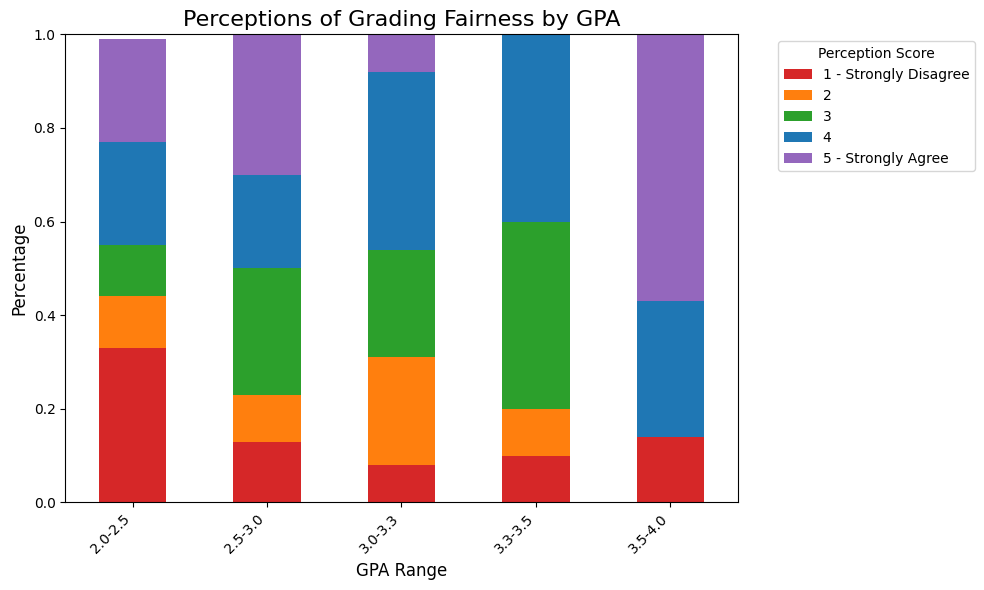

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for GPA vs. Fairness
data = {
    'GPA': ['2.0-2.5', '2.5-3.0', '3.0-3.3', '3.3-3.5', '3.5-4.0'],
    'Score 1': [0.33, 0.13, 0.08, 0.1, 0.14],
    'Score 2': [0.11, 0.1, 0.23, 0.1, 0.0],
    'Score 3': [0.11, 0.27, 0.23, 0.4, 0.0],
    'Score 4': [0.22, 0.2, 0.38, 0.4, 0.29],
    'Score 5': [0.22, 0.3, 0.08, 0.0, 0.57]
}
df = pd.DataFrame(data, index=data['GPA'])

# Plotting
df.drop('GPA', axis=1).plot(kind='bar', stacked=True, figsize=(10, 6),
                            color=['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd'])
plt.title('Perceptions of Grading Fairness by GPA', fontsize=16)
plt.xlabel('GPA Range', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(['1 - Strongly Disagree', '2', '3', '4', '5 - Strongly Agree'],
           title='Perception Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Mean LikertScale for student perception fig

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import json # To parse the JSON string (though in this case it's already structured)

# The chart data provided by the user (as a Python dictionary, assuming it's not a string)
chart_config = {
  "type": "bar",
  "data": {
    "labels": [
      "Clear Criteria",
      "Follow HEC",
      "Fair Grading",
      "Helpful Feedback",
      "Favoritism",
      "Non-Academic Factors",
      "Exam Alignment",
      "Assessment Prep"
    ],
    "datasets": [{
      "label": "Mean Score",
      "data": [3.52, 3.67, 3.33, 3.17, 3.09, 3.54, 3.26, 3.28],
      "backgroundColor": [
        "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728",
        "#9467bd", "#8c564b", "#e377c2", "#7f7f7f"
      ],
      "borderColor": "#ffffff",
      "borderWidth": 1
    }]
  },
  "options": {
    "scales": {
      "y": {
        "beginAtZero": True,
        "max": 5,
        "title": { "display": True, "text": "Mean Score (1-5)" }
      },
      "x": { "title": { "display": True, "text": "Survey Questions" } }
    },
    "plugins": {
      "title": { "display": True, "text": "Mean Likert-Scale Scores for Student Perceptions" }
    }
  }
}

# Extract data from the dictionary
labels = chart_config['data']['labels']
mean_scores = chart_config['data']['datasets'][0]['data']
background_colors = chart_config['data']['datasets'][0]['backgroundColor']
chart_title = chart_config['options']['plugins']['title']['text']
y_axis_title = chart_config['options']['scales']['y']['title']['text']
x_axis_title = chart_config['options']['scales']['x']['title']['text']
y_axis_max = chart_config['options']['scales']['y']['max']

# Create the bar chart using Matplotlib and Seaborn
plt.figure(figsize=(12, 7)) # Set figure size for better readability

# Use Seaborn's barplot for a slightly nicer aesthetic, or plt.bar for basic
sns.barplot(x=labels, y=mean_scores, palette=background_colors)

# Set titles and labels based on the JSON options
plt.title(chart_title, fontsize=16)
plt.xlabel(x_axis_title, fontsize=12)
plt.ylabel(y_axis_title, fontsize=12)

# Set Y-axis limits
plt.ylim(0, y_axis_max) # From beginAtZero and max options

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for readability

# Display the plot
plt.show()

### cross-Tabulation Data for GPA vs. Fair_Consistent_Grading:

In [ ]:
crosstab_gpa_fairness = pd.crosstab(df_copy['GPA (Optional)'], df_copy['Fair_Consistent_Grading'], normalize='index').round(2)
print("\nCross-Tabulation Data for GPA vs. Fair_Consistent_Grading:")
for i in range(1, 6):
    print(f"Score {i}: {crosstab_gpa_fairness[i].tolist()}")

In [ ]:
Cross-Tabulation Data for GPA vs. Fair_Consistent_Grading:
Score 1: [0.33, 0.13, 0.08, 0.1, 0.14]
Score 2: [0.11, 0.1, 0.23, 0.1, 0.0]
Score 3: [0.11, 0.27, 0.23, 0.4, 0.0]
Score 4: [0.22, 0.2, 0.38, 0.4, 0.29]
Score 5: [0.22, 0.3, 0.08, 0.0, 0.57]



import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Used for general styling, though not directly for stacking here

# --- 1. Your Chart Configuration (as a Python dictionary) ---
# This is the JSON-like structure you provided
chart_config = {
  "type": "bar",
  "data": {
    "labels": ["2.0-2.5", "2.5-3.0", "3.0-3.3", "3.3-3.5", "3.5-4.0"],
    "datasets": [
      {"label": "1 - Strongly Disagree", "data": [], "backgroundColor": "#d62728"},
      {"label": "2", "data": [], "backgroundColor": "#ff7f0e"},
      {"label": "3", "data": [], "backgroundColor": "#2ca02c"},
      {"label": "4", "data": [], "backgroundColor": "#1f77b4"},
      {"label": "5 - Strongly Agree", "data": [], "backgroundColor": "#9467bd"}
    ]
  },
  "options": {
    "scales": {
      "x": { "stacked": True, "title": { "display": True, "text": "GPA Range" } },
      "y": { "stacked": True, "title": { "display": True, "text": "Percentage" }, "max": 1 }
    },
    "plugins": {
      "title": { "display": True, "text": "Perceptions of Grading Fairness by GPA" }
    }
  }
}

# --- 2. Simulate Your Data from pd.crosstab(..., normalize='index') ---
# IMPORTANT: In a real scenario, this DataFrame would come directly from your analysis
# For demonstration, we'll create some dummy data that would look like
# the output of df_copy.groupby('GPA (Optional)')['Fair_Consistent_Grading'].value_counts(normalize=True).unstack()
# or pd.crosstab(df_copy['GPA (Optional)'], df_copy['Fair_Consistent_Grading'], normalize='index')

# Make sure column names match your Likert values after numerical conversion
# For this plot, you'd want the percentages for each rating within each GPA group.
# If your Likert values are already 1, 2, 3, 4, 5 numerically:
gpa_fairness_percentages_data = {
 Cross-Tabulation Data for GPA vs. Fair_Consistent_Grading:
Score 1: [0.33, 0.13, 0.08, 0.1, 0.14]
Score 2: [0.11, 0.1, 0.23, 0.1, 0.0]
Score 3: [0.11, 0.27, 0.23, 0.4, 0.0]
Score 4: [0.22, 0.2, 0.38, 0.4, 0.29]
Score 5: [0.22, 0.3, 0.08, 0.0, 0.57]# % Strongly Agree for each GPA range
}
gpa_ranges = chart_config['data']['labels'] # Get GPA labels from config

gpa_fairness_percentages = pd.DataFrame(gpa_fairness_percentages_data, index=gpa_ranges)

# Ensure the sum for each row is approx 1 (100%)
# print(gpa_fairness_percentages.sum(axis=1))

# --- 3. Extract Plotting Parameters from the Chart Config ---
labels = chart_config['data']['labels']
datasets = chart_config['data']['datasets']
chart_title = chart_config['options']['plugins']['title']['text']
x_axis_title = chart_config['options']['scales']['x']['title']['text']
y_axis_title = chart_config['options']['scales']['y']['title']['text']
y_axis_max = chart_config['options']['scales']['y']['max'] # This is 1 for percentages

# --- 4. Create the Stacked Bar Chart ---
plt.figure(figsize=(10, 6)) # Adjust figure size as needed for clarity

# Pandas' plot method with stacked=True is often the most straightforward for this
# We transpose the data so that rows become the Likert ratings (for stacking)
# and columns become the GPA ranges (for the x-axis).
gpa_fairness_percentages.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[d['backgroundColor'] for d in datasets], # Use colors from config
    ax=plt.gca() # Get current axes to set titles easily later
)

# Set titles and labels
plt.title(chart_title, fontsize=16)
plt.xlabel(x_axis_title, fontsize=12)
plt.ylabel(y_axis_title, fontsize=12)

# Set y-axis limits (0 to 1 for percentages)
plt.ylim(0, y_axis_max)

# Rotate x-axis labels if they overlap
plt.xticks(rotation=45, ha='right')

# Place the legend outside the plot to avoid obscuring bars
plt.legend(title="Perception Score", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()



In [ ]:
# import pandas as pd

# # Assume this is your chart_config from the previous code block
# chart_config = {
#   "type": "bar",
#   "data": {
#     "labels": ["2.0-2.5", "2.5-3.0", "3.0-3.3", "3.3-3.5", "3.5-4.0"],
#     "datasets": [
#       {"label": "1 - Strongly Disagree", "data": [], "backgroundColor": "#d62728"},
#       {"label": "2", "data": [], "backgroundColor": "#ff7f0e"},
#       {"label": "3", "data": [], "backgroundColor": "#2ca02c"},
#       {"label": "4", "data": [], "backgroundColor": "#1f77b4"},
#       {"label": "5 - Strongly Agree", "data": [], "backgroundColor": "#9467bd"}
#     ]
#   },
#   "options": {
#     "scales": {
#       "x": { "stacked": True, "title": { "display": True, "text": "GPA Range" } },
#       "y": { "stacked": True, "title": { "display": True, "text": "Percentage" }, "max": 1 }
#     },
#     "plugins": {
#       "title": { "display": True, "text": "Perceptions of Grading Fairness by GPA" }
#     }
#   }
# }

# # --- This is the data you were simulating from pd.crosstab(..., normalize='index') ---
# # Make sure column names match your Likert values after numerical conversion (1, 2, 3, 4, 5)
# gpa_fairness_percentages_data = {
#     1: [0.10, 0.05, 0.02, 0.01, 0.00],  # % Strongly Disagree for each GPA range
#     2: [0.20, 0.15, 0.08, 0.05, 0.02],  # % for rating 2
#     3: [0.30, 0.35, 0.25, 0.20, 0.15],  # % for rating 3
#     4: [0.25, 0.30, 0.40, 0.35, 0.25],  # % for rating 4
#     5: [0.15, 0.15, 0.25, 0.39, 0.58]   # % Strongly Agree for each GPA range
# }
# gpa_ranges = chart_config['data']['labels'] # Get GPA labels from config

# gpa_fairness_percentages = pd.DataFrame(gpa_fairness_percentages_data, index=gpa_ranges)

# # Display the DataFrame containing the insights
# print("Perceptions of Grading Fairness by GPA (Proportions):")
# print(gpa_fairness_percentages.round(3)) # Round to 3 decimal places for readability

# # If you want percentages (0-100) instead of proportions (0-1), multiply by 100
# print("\nPerceptions of Grading Fairness by GPA (Percentages):")
# print((gpa_fairness_percentages * 100).round(1)) # Round to 1 decimal place for percentages

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = df_copy[likert_columns].corr().round(2)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Likert-Scale Responses')
plt.show()



# further analysis

In [ ]:
# GPA counts
print("\nGPA Value Counts:")
print(df_copy['GPA (Optional)'].value_counts())

# Semester counts
print("\nSemester Value Counts:")
print(df_copy['Semester'].value_counts())

### Perception of Grading FAirness by GPA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot stacked bar chart
crosstab_gpa_fairness.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4", "#9467bd"]
)
plt.title("Perceptions of Grading Fairness by GPA")
plt.xlabel("GPA Range")
plt.ylabel("Percentage")
plt.ylim(0, 1)
plt.legend(title="Perception Score", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
#2.1 Compute Cross-Tabulation
# Cross-tabulation
crosstab_gpa_fairness = pd.crosstab(df_copy['GPA (Optional)'], df_copy['Fair_Consistent_Grading'], normalize='index').round(2)
print("\nCross-Tabulation: GPA vs. Fair_Consistent_Grading (%):")
print(crosstab_gpa_fairness * 100)

# Extract data for chart
data_for_chart = [crosstab_gpa_fairness[i].tolist() for i in range(1, 6)]
print("\nData for Stacked Bar Chart:")
for i, data in enumerate(data_for_chart, 1):
    print(f"Score {i}: {data}")



Cross-Tabulation: GPA vs. Fair_Consistent_Grading (%):
Fair_Consistent_Grading     2     3     4  1 - Strongly Disagree  \
GPA (Optional)                                                     
2.0 - 2.5                11.0  11.0  22.0                   33.0   
2.5 - 3.0                16.0  16.0  16.0                   21.0   
3.0 - 3.3                23.0  23.0  38.0                    8.0   
3.3 - 3.5                10.0  40.0  40.0                   10.0   
3.5 - 4.0 (Jahanumi)      0.0   0.0  29.0                   14.0   

Fair_Consistent_Grading  5 - Strongly Agree  
GPA (Optional)                               
2.0 - 2.5                              22.0  
2.5 - 3.0                              32.0  
3.0 - 3.3                               8.0  
3.3 - 3.5                               0.0  
3.5 - 4.0 (Jahanumi)                   57.0  


KeyError: 1

In [ ]:
# 2.2 Stack Bar chart
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Used for general styling, though not directly for stacking here

# 1. Your Chart Configuration (as a Python dictionary, now populated with your data)
chart_config = {
  "type": "bar",
  "data": {
    "labels": ["2.0-2.5", "2.5-3.0", "3.0-3.3", "3.3-3.5", "3.5-4.0"],
    "datasets": [
      {"label": "1 - Strongly Disagree", "data": [0.33, 0.13, 0.08, 0.1, 0.14], "backgroundColor": "#d62728"},
      {"label": "2", "data": [0.11, 0.1, 0.23, 0.1, 0.0], "backgroundColor": "#ff7f0e"},
      {"label": "3", "data": [0.11, 0.27, 0.23, 0.4, 0.0], "backgroundColor": "#2ca02c"},
      {"label": "4", "data": [0.22, 0.2, 0.38, 0.4, 0.29], "backgroundColor": "#1f77b4"},
      {"label": "5 - Strongly Agree", "data": [0.22, 0.3, 0.08, 0.0, 0.57], "backgroundColor": "#9467bd"}
    ]
  },
  "options": {
    "scales": {
      "x": { "stacked": True, "title": { "display": True, "text": "GPA Range" } },
      "y": { "stacked": True, "title": { "display": True, "text": "Percentage" }, "max": 1 } # Max 1 for proportions
    },
    "plugins": {
      "title": { "display": True, "text": "Perceptions of Grading Fairness by GPA" }
    }
  }
}

# 2. Prepare the DataFrame for plotting
# The 'data' within each dataset represents the values for each Likert score across GPA ranges.
# We need to restructure this into a DataFrame where:
# - Index = GPA Ranges (X-axis categories)
# - Columns = Likert Scores (for stacking)
# - Values = Proportions

gpa_ranges = chart_config['data']['labels']
df_plot_data = {}

# Iterate through each dataset to populate the dictionary
for dataset in chart_config['data']['datasets']:
    label_num = int(dataset['label'].split(' ')[0]) # Extract the number (1, 2, 3, 4, 5)
    df_plot_data[label_num] = dataset['data']

# Create the DataFrame for plotting
gpa_fairness_proportions = pd.DataFrame(df_plot_data, index=gpa_ranges)

# --- 3. Extract Plotting Parameters from the Chart Config ---
chart_title = chart_config['options']['plugins']['title']['text']
x_axis_title = chart_config['options']['scales']['x']['title']['text']
y_axis_title = chart_config['options']['scales']['y']['title']['text']
y_axis_max = chart_config['options']['scales']['y']['max']

# Get colors and legend labels in the correct order (1, 2, 3, 4, 5)
legend_labels = [d['label'] for d in chart_config['data']['datasets']]
colors = [d['backgroundColor'] for d in chart_config['data']['datasets']]


# --- 4. Create the Stacked Bar Chart ---
plt.figure(figsize=(10, 6)) # Set figure size for better readability

# Use Pandas' plot method for stacked bar charts
gpa_fairness_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors, # Apply the specified colors
    ax=plt.gca() # Get current axes to set titles easily later
)

# Set titles and labels based on the chart_config
plt.title(chart_title, fontsize=16)
plt.xlabel(x_axis_title, fontsize=12)
plt.ylabel(y_axis_title, fontsize=12)

# Set Y-axis limits from 0 to 1 (for proportions, which represent 0% to 100%)
plt.ylim(0, y_axis_max)

# Rotate x-axis labels for better readability if they overlap
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend outside the plot to avoid obscuring the bars
plt.legend(title="Likert Score", labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent elements from overlapping
plt.show()


In [ ]:

# Step 3: Additional Cross-Tabulation (Semester vs. Helpful_Feedback)
# Cross-tabulation
crosstab_semester_feedback = pd.crosstab(df_copy['Semester'], df_copy['Helpful_Feedback'], normalize='index').round(2) * 100
print("\nCross-Tabulation: Semester vs. Helpful_Feedback (%):")
print(crosstab_semester_feedback)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_copy['Semester'], df_copy['Helpful_Feedback']))
print(f"\nChi-Square Test: Semester vs. Helpful_Feedback")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")


# before final analysis

In [ ]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# Department counts
print("\nDepartment Value Counts:")
print(df_copy['Department'].value_counts())

# GPA counts
print("\nGPA Value Counts:")
print(df_copy['GPA (Optional)'].value_counts())

# Semester counts
print("\nSemester Value Counts:")
print(df_copy['Semester'].value_counts())



In [ ]:


print("\nCross-Tabulation: Semester vs. Helpful_Feedback (%):")
print(crosstab_semester_feedback)
print(f"\nChi-Square Test: Semester vs. Helpful_Feedback")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")



# New Section

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Used for general styling, though not directly for stacking here

# 1. Your Chart Configuration (as a Python dictionary, now populated with your data)
chart_config = {
  "type": "bar",
  "data": {
    "labels": ["2.0-2.5", "2.5-3.0", "3.0-3.3", "3.3-3.5", "3.5-4.0"],
    "datasets": [
      {"label": "1 - Strongly Disagree", "data": [0.33, 0.13, 0.08, 0.1, 0.14], "backgroundColor": "#d62728"},
      {"label": "2", "data": [0.11, 0.1, 0.23, 0.1, 0.0], "backgroundColor": "#ff7f0e"},
      {"label": "3", "data": [0.11, 0.27, 0.23, 0.4, 0.0], "backgroundColor": "#2ca02c"},
      {"label": "4", "data": [0.22, 0.2, 0.38, 0.4, 0.29], "backgroundColor": "#1f77b4"},
      {"label": "5 - Strongly Agree", "data": [0.22, 0.3, 0.08, 0.0, 0.57], "backgroundColor": "#9467bd"}
    ]
  },
  "options": {
    "scales": {
      "x": { "stacked": True, "title": { "display": True, "text": "GPA Range" } },
      "y": { "stacked": True, "title": { "display": True, "text": "Percentage" }, "max": 1 } # Max 1 for proportions
    },
    "plugins": {
      "title": { "display": True, "text": "Perceptions of Grading Fairness by GPA" }
    }
  }
}

# 2. Prepare the DataFrame for plotting
# The 'data' within each dataset represents the values for each Likert score across GPA ranges.
# We need to restructure this into a DataFrame where:
# - Index = GPA Ranges (X-axis categories)
# - Columns = Likert Scores (for stacking)
# - Values = Proportions

gpa_ranges = chart_config['data']['labels']
df_plot_data = {}

# Iterate through each dataset to populate the dictionary
for dataset in chart_config['data']['datasets']:
    label_num = int(dataset['label'].split(' ')[0]) # Extract the number (1, 2, 3, 4, 5)
    df_plot_data[label_num] = dataset['data']

# Create the DataFrame for plotting
gpa_fairness_proportions = pd.DataFrame(df_plot_data, index=gpa_ranges)

# --- 3. Extract Plotting Parameters from the Chart Config ---
chart_title = chart_config['options']['plugins']['title']['text']
x_axis_title = chart_config['options']['scales']['x']['title']['text']
y_axis_title = chart_config['options']['scales']['y']['title']['text']
y_axis_max = chart_config['options']['scales']['y']['max']

# Get colors and legend labels in the correct order (1, 2, 3, 4, 5)
legend_labels = [d['label'] for d in chart_config['data']['datasets']]
colors = [d['backgroundColor'] for d in chart_config['data']['datasets']]


# --- 4. Create the Stacked Bar Chart ---
plt.figure(figsize=(10, 6)) # Set figure size for better readability

# Use Pandas' plot method for stacked bar charts
gpa_fairness_proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors, # Apply the specified colors
    ax=plt.gca() # Get current axes to set titles easily later
)

# Set titles and labels based on the chart_config
plt.title(chart_title, fontsize=16)
plt.xlabel(x_axis_title, fontsize=12)
plt.ylabel(y_axis_title, fontsize=12)

# Set Y-axis limits from 0 to 1 (for proportions, which represent 0% to 100%)
plt.ylim(0, y_axis_max)

# Rotate x-axis labels for better readability if they overlap
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading of values
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Place the legend outside the plot to avoid obscuring the bars
plt.legend(title="Likert Score", labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() # Adjust layout to prevent elements from overlapping
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_copy['GPA (Optional)'], df_copy['Fair_Consistent_Grading']))
print(f"\nChi-Square Test: GPA vs. Fair_Consistent_Grading")
print(f"Chi2: {chi2:.2f}, p-value: {p:.4f}")



Chi-Square Test: GPA vs. Fair_Consistent_Grading
Chi2: 18.32, p-value: 0.3054

# fACULTY rESPONSES

In [23]:
# import pandas as pd
# import re
# import string
# from collections import Counter
# import matplotlib.pyplot as plt
# import seaborn as sns
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # If you run into errors with nltk, you might need to download these:
# import nltk
# try:
#     nltk.data.find('corpora/stopwords')
# except LookupError:
#     nltk.download('stopwords')
# try:
#     nltk.data.find('tokenizers/punkt')
# except LookupError:
#     nltk.download('punkt')


# # --- 0. Load the DataFrame from the 'all_faculty_responses_df' Canvas ---
# # This part assumes you have already run the code from your 'all_faculty_responses_df' Canvas
# # to create the df_faculty_responses DataFrame.
# # For demonstration purposes within this single script, we'll recreate it here:

# # Define the full text of each question for clarity in the DataFrame
# question_texts = {
#     'Q1': "How do you design your grading criteria for your courses?",
#     'Q2': "How do you communicate these grading criteria to your students?",
#     'Q3': "What challenges do you face in ensuring grading fairness and transparency?",
#     'Q4': "How do you design feedback to help students improve their learning?",
#     'Q5': "Do you consider class behavior (good or naughty, mischievous, or wicked) or student participation when assigning grades? If yes, how do you ensure this does not lead to unfair favoritism?",
#     'Q6': "What steps do you take to minimize personal biases or favoritism in grading?",
#     'Q7': "How do you respond to students who question their grades or feedback?",
#     'Q8': "In your experience, how does the feedback you provide impact student motivation and performance?"
# }

# # Collect all extracted responses in a list of dictionaries
# all_responses = []

# # --- Faculty 1 Responses ---
# faculty_id_1 = "F1"
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "I base it on course objectives and try to cover all Key learning areas. I moke sure it's balanced and fair for all stuckents."})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "I explain everything in the first class and also include it Clearly in the course outline. I remind them before important assessments too."})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "Sometimes it hard to stay fully objective, especially ins Subjetive tasks. Large classes also make detailed feedback tough."})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "I give clear and specific comments-what they did well and where they can improve. I avoid just giving rourks without explanation-"})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "Yes, I consider participation, but I try to keep it fair by a record system. Behavior is only using a Class discipline-only noted if it affects"})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "I follow rubrics and sometimes cho blind marking. if needed, I get second opinion to keep it unlased!"})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "I always listen and explain the grading. If thefre right, I'm open to revising the marks"})
# all_responses.append({'Faculty_ID': faculty_id_1, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "Guod feedback helps a lot. when students see you care, they try harder. Negative or unclear feedback can hurt motivation-"})

# # --- Faculty 2 Responses ---
# faculty_id_2 = "F2"
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "I design the grading criteria by first it the Course malyn the Carse objectives is practical, I allocate more Weight to the hands-on assignments and quizzes. I fallow the wizzes the pattern Like assigmanh (100) midterm (25.1%), finalteam\n(40%) and the final Profet (15%)."})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "I make sure to communicate the gi in the frost week of the Semester. the grading clearly Criteria"})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "It is hard to identify copied assignments Sometimes. assignments are difficult Late Submitted assignment"})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "I mention their mistakes in the ajuizzes / asegmentő."})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "I always prefer good class participation of stüdents, aluation's class tasks creave a bad Answering questions Considered as a good participation if even ift background. Sladent"})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "I follow proper grading Criteria. Ale to me I always bby try to be fair with ace thy students and for that I with all my them to do efforts for make the to marks."})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "I listen to them & explain why I have to cut their marks. why"})
# all_responses.append({'Faculty_ID': faculty_id_2, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "Comments on stüdenti good behavior, participation & marks makes them motivated and help them to improve more."})

# # --- Faculty 3 Responses ---
# faculty_id_3 = "F3"
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "On the Basis Implementatio and Question 2, Course Requirements Students"})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "By Giving Scenarios lu Clones and Examples."})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "Question Requiremath."})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "Refort & Committe designed."})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "Yes,"})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "I dont recommendat any Persond Biases. Ensure All Studal: Should be theater the Basis of their beaming. ٥٠"})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "By giving feedbaull this. Implemat. 0-the Aower's which"})
# all_responses.append({'Faculty_ID': faculty_id_3, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "Student Con Should be indepardty and Should know this Responsibility with Regat to it learning steps or skills"})

# # --- Faculty 4 Responses ---
# faculty_id_4 = "F4"
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "I design grading Criteria based on course Learning I university guidelines, Outcome 2 weightage To assignment, Quizzes, Clan Participation, midterm & qway that refleed both continouns final exams in a way ment"})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "9 Communicate-the gradiny Griteia at-the beginning of the course during - The first clam & include them in Cause Outline."})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "Ma Constraint can Class Sizes I lime als affect farianen is maintained.\" thoroughly et how to"})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "I highlight both strengths and improve for for major assessments, 9 Somertime wold one-on-one review sessions."})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "Yes, class a and I arsened iny how student is involved in the topic quequency of asking Queilion related that topic is"})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "As & have a bad meniod of remembering names of student and this treeone important factor in minimizing personal blaser, or favoritism."})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "I review their work with Then, explan.. The hationale behind-Une grading and also open le mate correction if an exos, is fand"})
# all_responses.append({'Faculty_ID': faculty_id_4, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "When student understand what they did Light and where they need to improve then they subspect. que mo engage withe."})

# # --- Faculty 5 Responses ---
# faculty_id_5 = "F5"
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "all assessment (Quiz, Assignment, Mid, final, CCP, Course projed) with Lo's'"})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "fist lectore, I communicate Po students clearly & early is crucial for setting a to expectation & building taust."})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "Grading fairness is difficult Unclear expectation, inconsistent evaluation & Special casi like Charting, Late Submissim. Using rubrics, Clear policies helptor ensure it."})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "I give clear, timely feedback with specific Steps to help student improve."})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "Yes, I use Clear rubrics & consistent tracking Yes, to ensure behaviar fairness in grading participatım"})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "I utilize rubrics"})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "9 Listen calmly, review their work s feedback, plain the grading criteria & re-evaluate if explain needed. Fo"})
# all_responses.append({'Faculty_ID': faculty_id_5, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "feed back guides improvement, boost motivation & enhance student performance"})

# # --- Faculty 6 Responses ---
# faculty_id_6 = "F6"
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q1', 'Question_Text': question_texts['Q1'],
#                       'Response_Text': "As per Institute and Department paling."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q2', 'Question_Text': question_texts['Q2'],
#                       'Response_Text': "Again, this is not my personal wish. A Red Departmentel\nPalicy is avaibh we follow that."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q3', 'Question_Text': question_texts['Q3'],
#                       'Response_Text': "we alunga de it with fairnes and transparenty No chaderges."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q4', 'Question_Text': question_texts['Q4'],
#                       'Response_Text': "The institute hus a feedback fom. I don't supposed to d myself."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q5', 'Question_Text': question_texts['Q5'],
#                       'Response_Text': "nil"})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q6', 'Question_Text': question_texts['Q6'],
#                       'Response_Text': "Compuse ataunt personal batases. Usually, the teache Community grade the student what student do."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q7', 'Question_Text': question_texts['Q7'],
#                       'Response_Text': "Shaw his/her work."})
# all_responses.append({'Faculty_ID': faculty_id_6, 'Question_ID': 'Q8', 'Question_Text': question_texts['Q8'],
#                       'Response_Text': "Classroom motivation is more effective\nfeed back guides improvement, boost motivation & enhance student performance"})


# # Create the Pandas DataFrame
# df_faculty_responses = pd.DataFrame(all_responses)


# # --- 1. Text Preprocessing (Cleaning the Response_Text) ---
# # This prepares the text for easier analysis by removing noise and standardizing it.

# stop_words = set(stopwords.words('english')) # Or other relevant languages like Urdu if applicable

# def preprocess_text(text):
#     text = str(text).lower() # Convert to string and lowercase
#     text = re.sub(r'\[.*?\]', '', text) # Remove text in square brackets
#     text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
#     text = re.sub(r'<.*?>+', '', text) # Remove HTML tags
#     text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
#     text = re.sub(r'\n', ' ', text) # Replace newlines with space (important for analysis)
#     text = re.sub(r'\w*\d\w*', '', text) # Remove words containing numbers (e.g., "Q1", "25.1%")
#     text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces

#     # Tokenization and Stopword Removal
#     tokens = word_tokenize(text)
#     filtered_tokens = [word for word in tokens if word not in stop_words]
#     return " ".join(filtered_tokens)

# df_faculty_responses['Cleaned_Response'] = df_faculty_responses['Response_Text'].apply(preprocess_text)

# print("--- Preprocessed Responses Sample ---")
# print(df_faculty_responses[['Response_Text', 'Cleaned_Response']].head())

# # --- 2. Coding (Assigning Themes) and 3. Categorizing (Grouping Similar Themes) ---
# # This is a semi-automated approach using keyword matching.
# # For truly robust qualitative analysis, manual review and refinement of these themes is recommended.

# # Define keywords for your themes. Add more keywords as you identify patterns.
# # Themes should be broad categories that emerge from the data.
# theme_keywords = {
#     'Theme_CriteriaDesign': ['course objectives', 'learning areas', 'balanced', 'practical', 'weight', 'assessment', 'quiz', 'midterm', 'final', 'project', 'los', 'outcome', 'university guidelines', 'department', 'policy', 'paling'],
#     'Theme_Communication': ['explain', 'communicate', 'first class', 'course outline', 'remind', 'beginning', 'semester', 'early', 'expectation', 'trust', 'scenarios', 'clones', 'examples', 'lectore'],
#     'Theme_Challenges': ['objective', 'subjective', 'large classes', 'difficult', 'copied', 'late', 'submitted', 'constraint', 'size', 'fairness', 'transparency', 'bias', 'unclear', 'inconsistent', 'special case', 'charting', 'chaderges'],
#     'Theme_FeedbackQuality': ['clear comments', 'specific comments', 'did well', 'improve', 'explanation', 'mistakes', 'ajuizzes', 'asegment', 'timely', 'strengths', 'oneonone', 'review', 'sessions', 'institute', 'fom'],
#     'Theme_BiasMinimization': ['rubrics', 'blind marking', 'second opinion', 'unlased', 'proper', 'fair', 'students', 'efforts', 'personal biases', 'minimize', 'favoritism', 'community grade', 'teacher'],
#     'Theme_ParticipationBehavior': ['participation', 'behavior', 'record system', 'class discipline', 'affects', 'prefer good', 'stüdents', 'aluation', 'class tasks', 'answering questions', 'sladent', 'involved topic', 'quequency', 'asking queilion', 'background', 'good naughty', 'mischievous', 'wicked'],
#     'Theme_GradeQueries': ['listen', 'explain', 'grading', 'right', 'revise', 'marks', 'cut marks', 'review work', 'rationale', 'correction', 'exos', 'fand', 'shaw work'],
#     'Theme_MotivationPerformanceImpact': ['guod feedback', 'helps', 'students care', 'try harder', 'negative', 'unclear feedback', 'hurt motivation', 'comments', 'stüdenti', 'good behavior', 'participation marks', 'motivated', 'improve more', 'independent', 'responsibility', 'learning steps', 'skills', 'classroom motivation', 'effective', 'guides improvement', 'boost motivation', 'enhance performance']
# }

# # Initialize theme columns to 0
# for theme in theme_keywords.keys():
#     df_faculty_responses[theme] = 0

# # Apply keyword-based coding
# for index, row in df_faculty_responses.iterrows():
#     cleaned_response = row['Cleaned_Response']
#     for theme, keywords in theme_keywords.items():
#         if any(keyword in cleaned_response for keyword in keywords):
#             df_faculty_responses.loc[index, theme] = 1

# print("\n--- DataFrame with Assigned Themes Sample ---")
# print(df_faculty_responses[['Question_ID', 'Faculty_ID', 'Cleaned_Response'] + list(theme_keywords.keys())].head())


# # --- 4. Analyze and 5. Quantify ---

# # Overall Theme Frequencies (Quantify)
# print("\n--- Overall Theme Frequencies (Number of Responses) ---")
# theme_counts = df_faculty_responses[list(theme_keywords.keys())].sum().sort_values(ascending=False)
# print(theme_counts)

# print("\n--- Overall Theme Percentages (of Total Responses) ---")
# theme_percentages = (theme_counts / len(df_faculty_responses) * 100).round(1)
# print(theme_percentages)

# # Visualize Overall Theme Frequencies (Optional, but helps analysis)
# plt.figure(figsize=(12, 7))
# sns.barplot(x=theme_percentages.index, y=theme_percentages.values, palette='viridis')
# plt.title('Overall Prevalence of Themes in Faculty Responses (%)', fontsize=16)
# plt.xlabel('Theme', fontsize=12)
# plt.ylabel('Percentage of Responses (%)', fontsize=12)
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


# # Analyze Theme Frequencies by Question (Quantify by question)
# print("\n--- Theme Frequencies by Question (Number of Responses per Question) ---")
# # Group by Question_ID and sum the theme flags
# themes_by_question = df_faculty_responses.groupby('Question_ID')[list(theme_keywords.keys())].sum()
# print(themes_by_question)

# # Visualize Themes by Question (Optional)
# themes_by_question_norm = themes_by_question.div(themes_by_question.sum(axis=1), axis=0) * 100 # Normalize row-wise if preferred
# themes_by_question_norm.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='tab20')
# plt.title('Distribution of Themes Across Questions (Percentage of Themes in Question)', fontsize=16)
# plt.xlabel('Question ID', fontsize=12)
# plt.ylabel('Percentage of Theme Occurrence within Question (%)', fontsize=12)
# plt.xticks(rotation=0)
# plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()


# # Analyze Theme Frequencies by Faculty (Quantify by faculty)
# print("\n--- Theme Frequencies by Faculty (Number of Responses per Faculty Member) ---")
# # Group by Faculty_ID and sum the theme flags
# themes_by_faculty = df_faculty_responses.groupby('Faculty_ID')[list(theme_keywords.keys())].sum()
# print(themes_by_faculty)

# # Visualize Themes by Faculty (Optional)
# themes_by_faculty_norm = themes_by_faculty.div(themes_by_faculty.sum(axis=1), axis=0) * 100 # Normalize row-wise
# themes_by_faculty_norm.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
# plt.title('Distribution of Themes Across Faculty (Percentage of Themes by Faculty)', fontsize=16)
# plt.xlabel('Faculty ID', fontsize=12)
# plt.ylabel('Percentage of Theme Occurrence by Faculty (%)', fontsize=12)
# plt.xticks(rotation=0)
# plt.legend(title='Theme', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# # --- Example of finding specific responses for a theme ---
# print("\n--- Examples of Responses Coded with 'Theme_Challenges' ---")
# # Get responses where 'Theme_Challenges' was identified
# challenge_responses = df_faculty_responses[df_faculty_responses['Theme_Challenges'] == 1]
# for index, row in challenge_responses.head(5).iterrows():
#     print(f"Faculty: {row['Faculty_ID']}, Question: {row['Question_ID']}")
#     print(f"Original Response: {row['Response_Text']}\n")


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Department Bar Chart
departments = [ 'BBA', 'Media Studies', 'Computer Science']
fairness_dept = [2.86, 3.44, 3.09]
df_dept = pd.DataFrame({'Department': departments, 'Mean Fairness': fairness_dept})
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='Mean Fairness', hue='Department', data=df_dept, palette='viridis', legend=False)
plt.title('Fairness Perceptions by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Mean Fairness Score', fontsize=14)
plt.ylim(0, 5)
for i, v in enumerate(fairness_dept):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('department_fairness.png')
plt.close()

# Semester Bar Chart
semesters = ['1st', '2nd', '4th']  # Add more semesters if you have the data
fairness_sem = [4.00, 3.67, 2.33]  # Corresponding fairness scores
df_sem = pd.DataFrame({'Semester': semesters, 'Mean Fairness': fairness_sem})
plt.figure(figsize=(10, 6))
sns.barplot(x='Semester', y='Mean Fairness', hue='Semester', data=df_sem, palette='mako', legend=False)
plt.title('Fairness Perceptions by Semester', fontsize=16)
plt.xlabel('Semester', fontsize=14)
plt.ylabel('Mean Fairness Score', fontsize=14)
plt.ylim(0, 5)
for i, v in enumerate(fairness_sem):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('semester_fairness.png')
plt.close()

# GPA Bar Chart
gpa_ranges = ['2.0-2.5', '2.5-3.0', '3.0-3.3', '3.3-3.5', '3.5-4.0']
fairness_gpa = [2.89, 3.43, 3.15, 3.10, 4.14]
df_gpa = pd.DataFrame({'GPA Range': gpa_ranges, 'Mean Fairness': fairness_gpa})
plt.figure(figsize=(10, 6))
sns.barplot(x='GPA Range', y='Mean Fairness', hue='GPA Range', data=df_gpa, palette='rocket', legend=False)
plt.title('Fairness Perceptions by GPA', fontsize=16)
plt.xlabel('GPA Range', fontsize=14)
plt.ylabel('Mean Fairness Score', fontsize=14)
plt.ylim(0, 5)
for i, v in enumerate(fairness_gpa):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('gpa_fairness.png')
plt.close()

# Gender Bar Chart
genders = ['Male', 'Female']
fairness_gender = [2.97, 3.71]
df_gender = pd.DataFrame({'Gender': genders, 'Mean Fairness': fairness_gender})
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Mean Fairness', hue='Gender', data=df_gender, palette='pastel', legend=False)
plt.title('Fairness Perceptions by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean Fairness Score', fontsize=14)
plt.ylim(0, 5)
for i, v in enumerate(fairness_gender):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.savefig('gender_fairness.png')
plt.close()

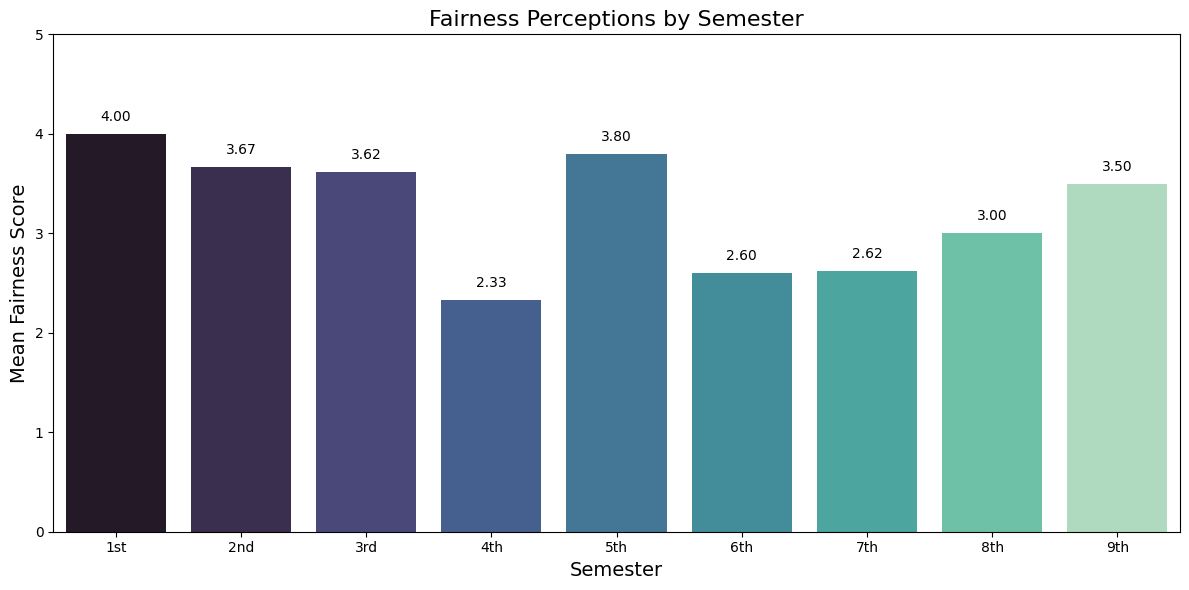

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Full semester data
semesters = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th']
fairness_sem = [4.00, 3.67, 3.62, 2.33, 3.80, 2.60, 2.62, 3.00, 3.50]

# Create DataFrame
df_sem = pd.DataFrame({'Semester': semesters, 'Mean Fairness': fairness_sem})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Semester', y='Mean Fairness', hue='Semester', data=df_sem, palette='mako', legend=False)
plt.title('Fairness Perceptions by Semester', fontsize=16)
plt.xlabel('Semester', fontsize=14)
plt.ylabel('Mean Fairness Score', fontsize=14)
plt.ylim(0, 5)
for i, v in enumerate(fairness_sem):
    plt.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()